In [1]:
# Import of the required libraries
import georinex as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
from datetime import datetime as dtt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.patches as mpatches

# Import of the software's modules
import functions as fn
import transformations as trf
import pointPositioning as pp
import RINEXreader 
import easyPlot

In [2]:
nav_path = 'C:/git/pointPositioning/pointPositioning/mose_nav.rnx'
obs_path = 'C:/git/pointPositioning/pointPositioning/mose_obs.crx'
eph_path = 'C:/git/pointPositioning/pointPositioning/EPH_2021_5_6.SP3'

In [3]:
time_range = []
START = dtt.strptime('2021-05-06 00:00:00', '%Y-%m-%d %H:%M:%S')
END = dtt.strptime('2021-05-06 23:45:00', '%Y-%m-%d %H:%M:%S')
t = START
while t <= END:
    time_range.append(t)
    t = t + datetime.timedelta(minutes=5)

In [4]:
sat_gps = pd.read_csv('C:/git/pointPositioning/pointPositioning/csv/sat_gps.csv')

conv_t = []
for i in range(len(sat_gps)):
    t_i = sat_gps['time'][i]
    t_i_conv = dtt.strptime(t_i, '%Y-%m-%d %H:%M:%S')
    conv_t.append(t_i_conv)

sat_gps = sat_gps.drop(columns=['Unnamed: 0', 'time'])
sat_gps['time'] = conv_t


In [5]:
sat_gal = fn.getGALILEOorbits(nav_path, obs_path, time_range)

In [12]:
from NQ import TEC as modTEC
from NQ import modelParams as mp

In [13]:
mose_cart = [4642432.50, 1028629.40, 4236854.20]
mose_geod = trf.cartToGeod(4642432.50, 1028629.40, 4236854.20)
lat = mose_geod[0]
lon = mose_geod[1]
h = mose_geod[2]*10**(-3)

P1 = [lat, lon, h]

delays = pd.DataFrame(columns = ['sv', 'time', 'TEC'])
for i in range(len(sat_gal)):
    time = sat_gal['time'][i]
    parametri = mp.getModelParams(lat, lon, time, nav_path)
    xs, ys, zs = sat_gal['xs'][i], sat_gal['ys'][i], sat_gal['zs'][i]
    P2 = trf.cartToGeod(xs, ys, zs)
    P2[2] = P2[2]*10**(-3)
    TEC_i = modTEC.getTEC(P1, P2, parametri)
    new_row = pd.DataFrame([[time, sat_gal['sv'][i], TEC_i]], columns = ['sv', 'time', 'TEC'])
    delays = delays.append(new_row)

delays = delays.reset_index().drop(columns=['index'])

sat_gal['TEC'] = delays['TEC']

Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:

Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:

Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:

Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:

Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:

Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:

Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:

Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:

Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:

Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:

n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant T

n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algo

Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:

Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:  8
n:  16
n:  8
n:  16
Slant TEC algorithm used
n:  8
n:  16
n:

In [17]:
sat_gal['iono_delay'] = sat_gal['TEC']*40.3*10**16/(1575.42*10**6)**2
sat = pd.concat([sat_gps, sat_gal]).reset_index().drop(columns=['index'])

In [18]:
cutoff = 5
results = pp.pointPositioning2(sat, nav_path, obs_path, cutoff)

2021-05-06 00:00:00 ok
2021-05-06 00:05:00 ok
2021-05-06 00:10:00 ok
2021-05-06 00:15:00 ok
2021-05-06 00:20:00 ok
2021-05-06 00:25:00 ok
2021-05-06 00:30:00 ok
2021-05-06 00:35:00 ok
2021-05-06 00:40:00 ok
2021-05-06 00:45:00 ok
2021-05-06 00:50:00 ok
2021-05-06 00:55:00 ok
2021-05-06 01:00:00 ok
2021-05-06 01:05:00 ok
2021-05-06 01:10:00 ok
2021-05-06 01:15:00 ok
2021-05-06 01:20:00 ok
2021-05-06 01:25:00 ok
2021-05-06 01:30:00 ok
2021-05-06 01:35:00 ok
2021-05-06 01:40:00 ok
2021-05-06 01:45:00 ok
2021-05-06 01:50:00 ok
2021-05-06 01:55:00 ok
2021-05-06 02:00:00 ok
2021-05-06 02:05:00 ok
2021-05-06 02:10:00 ok
2021-05-06 02:15:00 ok
2021-05-06 02:20:00 ok
2021-05-06 02:25:00 ok
2021-05-06 02:30:00 ok
2021-05-06 02:35:00 ok
2021-05-06 02:40:00 ok
2021-05-06 02:45:00 ok
2021-05-06 02:50:00 ok
2021-05-06 02:55:00 ok
2021-05-06 03:00:00 ok
2021-05-06 03:05:00 ok
2021-05-06 03:10:00 ok
2021-05-06 03:15:00 ok
2021-05-06 03:20:00 ok
2021-05-06 03:25:00 ok
2021-05-06 03:30:00 ok
2021-05-06 

In [19]:
M0SE_cart = [4642432.701789316, 1028629.1051167124, 4236854.058403561]
results_LC = trf.GCtoLC(M0SE_cart, results)

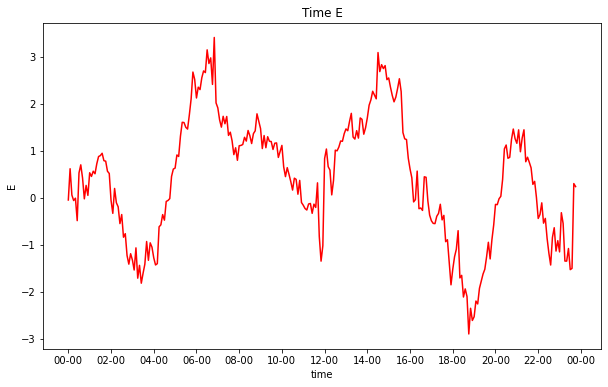

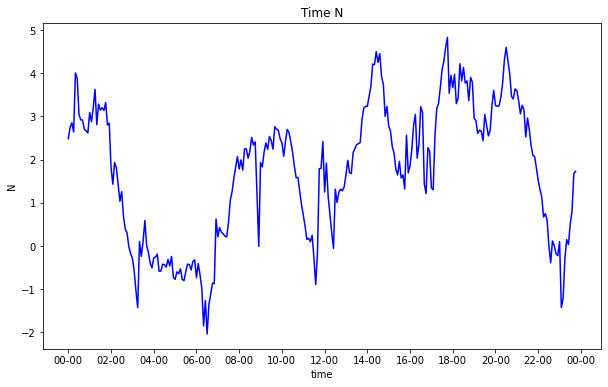

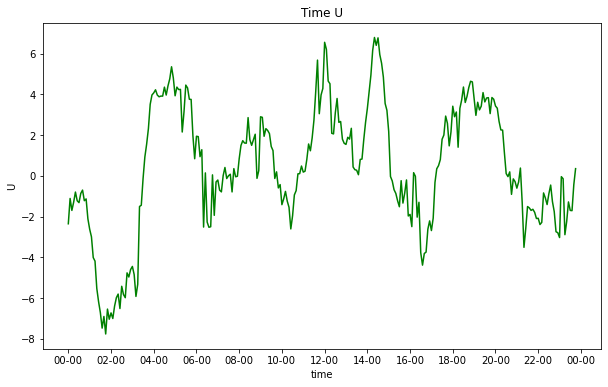

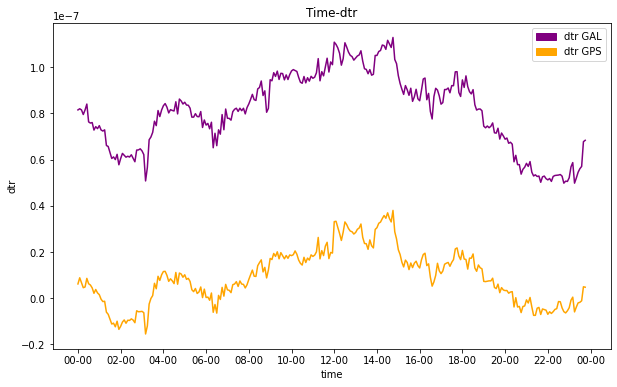

In [20]:
easyPlot.getPlot(results_LC, 'time', 'E', 'red')
easyPlot.getPlot(results_LC, 'time', 'N', 'blue')
easyPlot.getPlot(results_LC, 'time', 'U', 'green')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(results['datetime'], results['dtr_GPS'], '-', color='orange')
ax.plot(results['datetime'], results['dtr_GAL'], '-', color='purple')
#ax.plot(results['datetime'], results['dtr_GAL']-results['dtr_GPS'], '-', color='red')
ax.set(xlabel='time', ylabel='dtr', title = 'Time-dtr')
o_patch = mpatches.Patch(color='orange', label='dtr GPS')
p_patch = mpatches.Patch(color='purple', label='dtr GAL')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%H-%M"))
plt.legend(handles=[p_patch, o_patch])
plt.show()

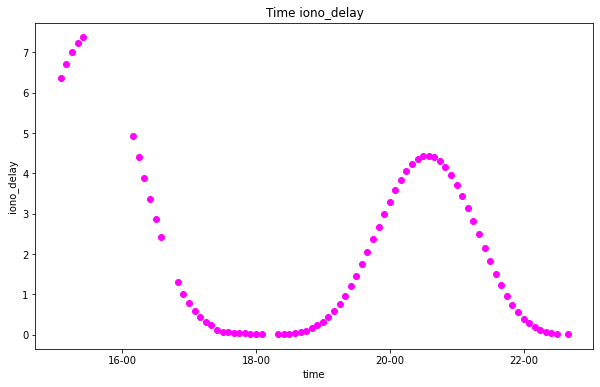

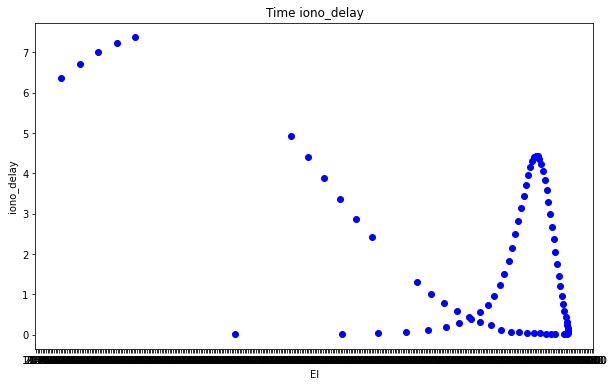

In [23]:
def getPlot(res, x, y, col):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(res[x], res[y], 'o',
            color=col)
    ax.set(xlabel=x, ylabel=y, title = 'Time '+y)
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_major_formatter(DateFormatter("%H-%M"))
    plt.show()

sat_i = sat[sat['sv'] == 'E33'].reset_index()
getPlot(sat_i, 'time', 'iono_delay', 'magenta')
sat_i['xr'] = sat_i['xs']
sat_i['yr'] = sat_i['ys']
sat_i['zr'] = sat_i['zs']

sat_i_LC = trf.GCtoLC(M0SE_cart, sat_i)
sat_i_LC['iono_delay'] = sat_i['iono_delay']
sat_i_LC['time'] = sat_i['time']
sat_i_LC['hd'] = np.sqrt(sat_i_LC['E']**2 + sat_i_LC['U']**2)

elevation, azimuth = [], []

for i in range(len(sat_i_LC)):
    if sat_i_LC['hd'][i] < 0.1:
        Az = 0
        El = 90
    else:
        Az = trf.radToDeg(np.arctan2(sat_i_LC['E'][i],sat_i_LC['N'][i]))
        El = trf.radToDeg(np.arctan2(sat_i_LC['U'][i],sat_i_LC['hd'][i]))
    azimuth.append(Az)
    elevation.append(El)

sat_i_LC['Az'] = azimuth
sat_i_LC['El'] = elevation
sat_i_LC['time'] = sat_i['time']

#sat_i_LC = sat_i_LC.sort_values('tme', ascending=True).reset_index()

getPlot(sat_i_LC, 'El', 'iono_delay', 'blue')


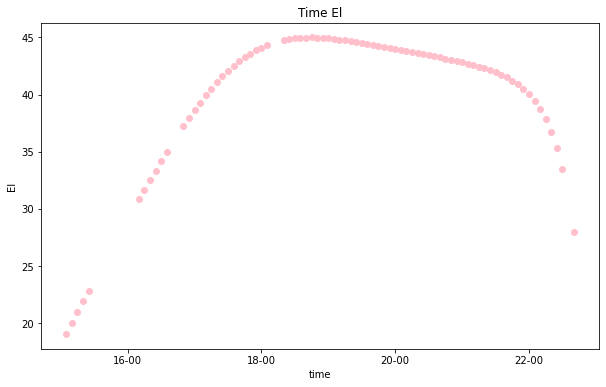

2021-05-06 15:05:00  El:  19.057158180519135  IONO:  6.350719687768454
2021-05-06 15:10:00  El:  20.02184723571063  IONO:  6.718501698439425
2021-05-06 15:15:00  El:  20.972323229066554  IONO:  7.011728097690393
2021-05-06 15:20:00  El:  21.910374731014475  IONO:  7.231119527991905
2021-05-06 15:25:00  El:  22.83758238100352  IONO:  7.367300782825013
2021-05-06 16:10:00  El:  30.83578918522284  IONO:  4.924242953867608
2021-05-06 16:15:00  El:  31.687016992416464  IONO:  4.4032616499697275
2021-05-06 16:20:00  El:  32.52789715780853  IONO:  3.8797627059648376
2021-05-06 16:25:00  El:  33.356836378476814  IONO:  3.3661936142124094
2021-05-06 16:30:00  El:  34.172005754471314  IONO:  2.877475470847618
2021-05-06 16:35:00  El:  34.97136892122871  IONO:  2.422745915395859
2021-05-06 16:50:00  El:  37.25192957920788  IONO:  1.3086083588554647
2021-05-06 16:55:00  El:  37.964924825081965  IONO:  1.0172379895619532
2021-05-06 17:00:00  El:  38.65027635408572  IONO:  0.7764397432529022
2021-05

In [24]:
sat_i_LC = sat_i_LC.sort_values('time', ascending=True).reset_index()
getPlot(sat_i_LC, 'time', 'El', 'pink')
for i in range(len(sat_i_LC)):
    print(sat_i_LC['time'][i], ' El: ', sat_i_LC['El'][i], ' IONO: ', sat_i_LC['iono_delay'][i] )

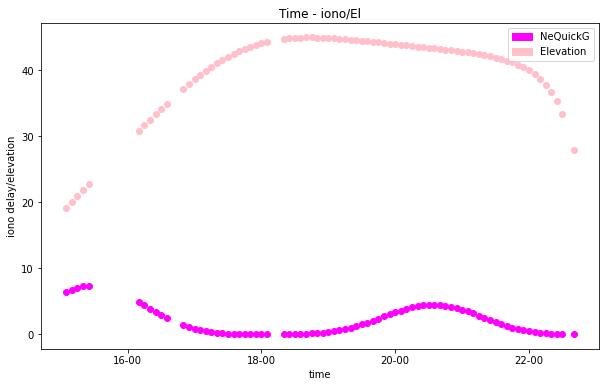

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(sat_i_LC['time'], sat_i_LC['El'], 'o', color='pink')
ax.plot(sat_i_LC['time'], sat_i_LC['iono_delay'], 'o', color='magenta')
ax.set(xlabel='time', ylabel='iono delay/elevation', title = 'Time - iono/El')
o_patch = mpatches.Patch(color='pink', label='Elevation')
p_patch = mpatches.Patch(color='magenta', label='NeQuickG')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%H-%M"))
plt.legend(handles=[p_patch, o_patch])
plt.show()

# Load with georinex library of nav and obs rinex info

In [ ]:
# Loading of GPS navigation parameters from NAV RINEX
param_gps = gr.load(nav_path)
df_gps = param_gps.to_dataframe()
df_gps = ((df_gps.dropna()).sort_values(by=['time'], ascending = True)).reset_index()
# Corrupted timestamps are corrected
df_gps = fn.fixTime(df_gps)

# Loading of GPS code observations in a DataSet
obs = gr.load(obs_path)

data = df_gps['time'][0]

In [ ]:
print(obs.to_dataframe())

In [ ]:
# Definition of time range in which we want to carry out the analysis (get Satellite position, velocity and clockoffset and
# perform Point Positioning)
time_range = []

START = df_gps['time'].min()
END = dtt.strptime('2021-05-27 00:00:00', '%Y-%m-%d %H:%M:%S')
t = START
while t <= END:
    time_range.append(t)
    t = t + datetime.timedelta(minutes=5)
mask_par = df_gps['time'] <= END
df_gps = df_gps[mask_par].reset_index().drop(columns=['index'])
    
# List of the timestamps of the available observation (we can perform Point Positioning only when we have sufficient 
# code observations)
time_obs = obs.time.to_dataframe()['time'].tolist()

# Satellites positions, velocities and clock offsets

In [ ]:
# Definition of the empty DataFrame that will contain the results
satellites = pd.DataFrame(columns = ['time', 'sv', 'xs', 'ys', 'zs', 'xs_dot', 'ys_dot', 'zs_dot', 'ts', 'C1'])

for w in time_range:
    # The list of satellites, whose parameter we want to estimate, is obtained from the available observations:
    # for each instant of time in time_range we select the in-view satellite
    # their position, velocity and clock offset are the computed
    if w in time_obs:
        obs_tk = (obs.sel(time = w)).to_dataframe().reset_index()
        obs_tk = obs_tk[['time', 'sv', 'C1']].dropna().reset_index()
        available_sat = (obs_tk['sv']).to_list()
        if len(available_sat) > 0:
            for sv_i in available_sat:
                # Every satellite in view at the considered epoch is associated with the parameter slot 
                # to which it belongs through the getPar function
                sat_par = fn.getPar(sv_i, w, df_gps)
                # If the navigation parameters are available:
                if type(sat_par) == pd.core.frame.DataFrame:
                    sat = fn.satPosVel(sat_par).reset_index()
                    sat = sat.merge(obs_tk, on = ['sv', 'time'], how = 'left')
                    satellites = satellites.append(sat)
        
satellites = satellites.reset_index()
satellites = satellites[['time', 'sv', 'xs', 'ys', 'zs', 'xs_dot', 'ys_dot', 'zs_dot', 'ts', 'C1']]

print(satellites)

In [ ]:
satellites['P1'] = satellites['C1']

# Check on satellites' position and clock offsets

In [ ]:
confronto = fn.checkSatPos(satellites, eph_path)

# Check on satellites' velocity

In [ ]:
velocita = fn.checkSatVel(satellites, df_gps)

# Point Positioning

In [ ]:
# Alpha and Beta paramethers for computing Ionosphere correction are read from nav RINEX through an apposite function
ionoParams = RINEXreader.getIonoParams(nav_path)
print('Inosphere parameters: ', ionoParams)

# Definition of the initial position of the receiver (from OBS RINEX)
R_0 = RINEXreader.getStartPos(obs_path)

# Performing of Point Positioning with the apposite function
results = pp.pointPositioning(satellites, R_0, ionoParams, cutoff)

print(results)

In [ ]:
print('Statistical analysis on Point Positioning results:')
print('Mean values: ')
print('XR: ', results['xr'].mean())
print('YR: ', results['yr'].mean())
print('ZR: ', results['zr'].mean())
print('dtR: ', results['dtr'].mean())

print('Standard deviation: ')
print('XR: ', results['xr'].std())
print('YR: ', results['yr'].std())
print('ZR: ', results['zr'].std())
print('dtR: ', results['dtr'].std())

# Transformation in Local Cartesian

In [ ]:
# Coordinates of the receiver, Milan Permanent Station, reference: SPIN3GNSS
#P0_g = [45.478368630552694, 9.229212872263435, 191.12520962953568]
#P0_cart = trf.geodToCart(45.478368630552694, 9.229212872263435, 191.12520962953568)

#Zimmerwald
P0_cart = [4331300.16, 567537.08, 4633133.51]
P0_g = trf.cartToGeod(4331300.16, 567537.08, 4633133.51)

results_LC = pd.DataFrame()
results_LC['dx'] = results['xr'] - P0_cart[0]
results_LC['dy'] = results['yr'] - P0_cart[1]
results_LC['dz'] = results['zr'] - P0_cart[2]

E=[]
N=[]
U=[]

lat0 = trf.degToRad(P0_g[0])
lon0 = trf.degToRad(P0_g[1])

# Definition of the rotation matrix
R = np.array([ [-np.sin(lon0), np.cos(lon0), 0],
                [-np.sin(lat0)*np.cos(lon0), -np.sin(lat0)*np.sin(lon0), np.cos(lat0)],
                [np.cos(lat0)*np.cos(lon0), np.cos(lat0)*np.sin(lon0), np.sin(lat0)]
                ])

for i in range(len(results_LC)):
    delta_array_i = np.array([[results_LC['dx'][i]], [results_LC['dy'][i]], [results_LC['dz'][i]]])
    ENU =np.dot(R, delta_array_i)
    E.append(ENU[0][0])
    N.append(ENU[1][0])
    U.append(ENU[2][0])

results_LC['E'] = E
results_LC['N'] = N
results_LC['U'] = U
results_LC['time'] = results['datetime']
results_LC = results_LC.reset_index()

In [ ]:
print('MEDIA ERRORI:')
print('Est: ', results_LC['E'].mean(), '\n',
      'Nord: ', results_LC['N'].mean(), '\n',
      'Quota: ', results_LC['U'].mean() )

print('DEVIAZIONE STANDARD:', '\n',
      'Est: ', results_LC['E'].std(), '\n',
      'Nord: ', results_LC['N'].std(), '\n',
      'Quota: ', results_LC['U'].std() )

print('Valori Massimi:', '\n',
      'Est: ', abs(results_LC['E']).max(), '\n',
      'Nord: ', abs(results_LC['N']).max(), '\n',
      'Quota: ', abs(results_LC['U']).max() )

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(results_LC['time'], results_LC['E'],
        '-',
        color='red')
ax.set(xlabel="Time", ylabel='EAST', title = 'Time-EAST')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%H-%M"))
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(results_LC['time'], results_LC['N'],
        '-',
        color='blue')
ax.set(xlabel="Time", ylabel='NORTH', title = 'Time-NORTH')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%H-%M"))
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(results_LC['time'], results_LC['U'],
        '-',
        color='green')
ax.set(xlabel="Time", ylabel='UP', title = 'Time-UP')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%H-%M"))
plt.show()